In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

# read spec data
z = 0.0307
spec = '../spectroscopy/ZTF20aayhacx_20200507_P60_v2.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# 20200507_P60

## Si II 6355

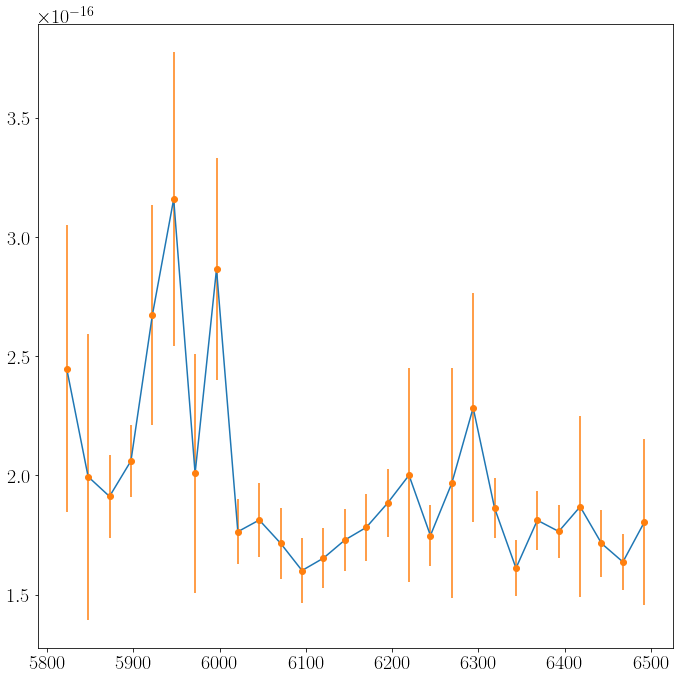

In [4]:
Spec1.plot_line_region(5800, 6500)

In [5]:
Spec1.add_line('SiII_6355', 5900, 6300, lines=[6371.359, 6347.103])

16 points within 5900.00 and 6300.00 angstroms.


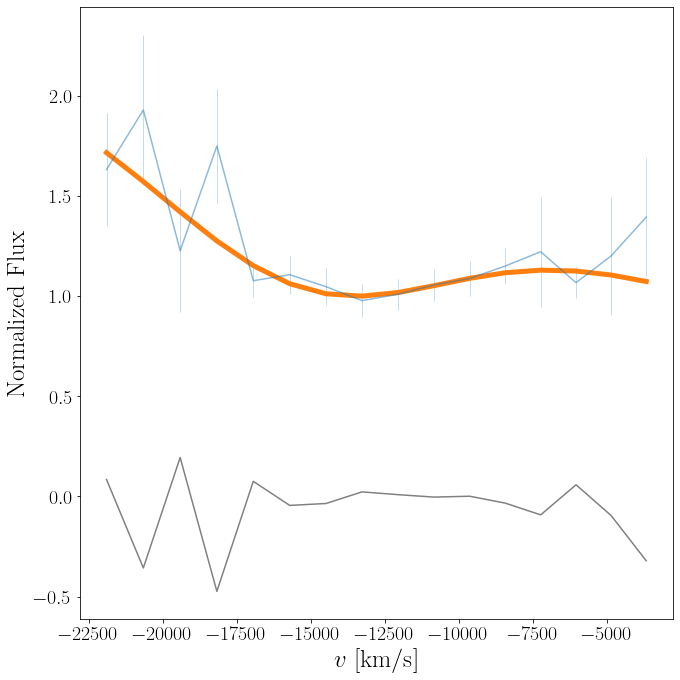

LS estimation:
Velocity pvf: -14685 km/s


In [6]:
Spec1.line['SiII_6355'].LS_estimator()

In [ ]:
sampler = Spec1.line['SiII_6355'].MCMC_sampler()

In [ ]:
vel.plot_MCMC(sampler, 200)

## Ca II IRT

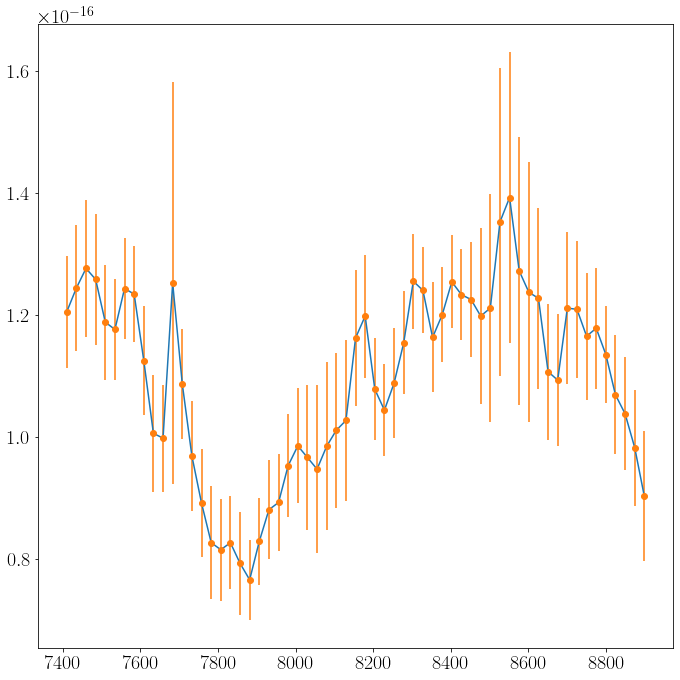

In [3]:
Spec1.plot_line_region(7400, 8900)

In [4]:
Spec1.add_line('CaII_IRT', 7600, 8700, lines=[8498.018, 8542.089, 8662.140])

44 points within 7600.00 and 8700.00 angstroms.


/Users/chang/Desktop/SNIa/SN2020jgb/rv/absorption_line_vel.py:78: UserWarning: Some flux with extremely low uncertainty!
  warnings.warn("Some flux with extremely low uncertainty!")


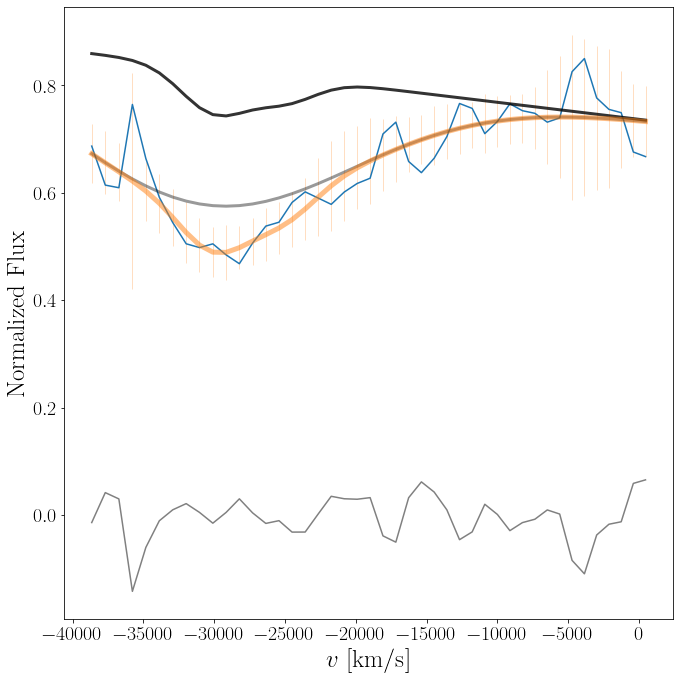

LS estimation:
Velocity pvf: -25028 km/s
Velocity hvf: -27146 km/s


In [5]:
Spec1.line['CaII_IRT'].LS_estimator(guess=(1, 1, -12000, 15, -1000, -25000, 15, -1000))

100%|██████████| 1500/1500 [00:19<00:00, 76.50it/s]


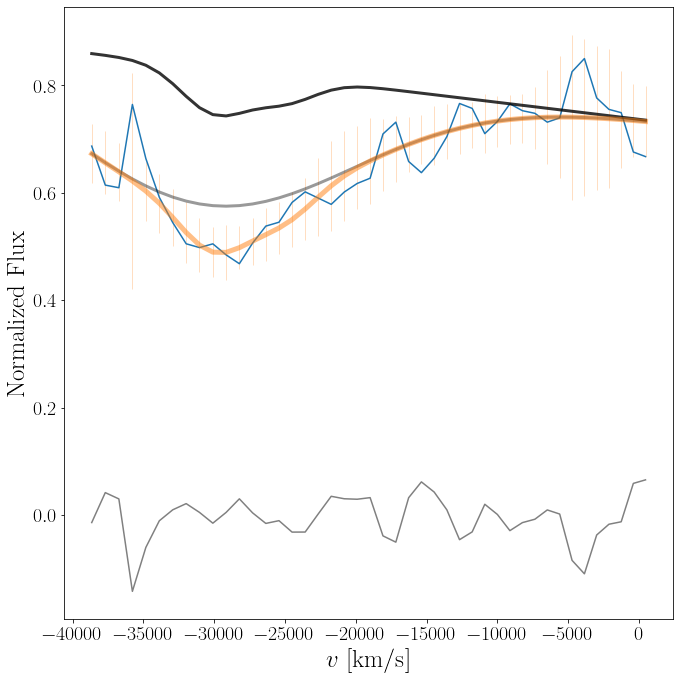

MCMC results:
Velocity pvf: -12036 pm 502 km/s
Velocity hvf: -25198 pm 728 km/s


In [8]:
mu_pvf_prior = -12000  #Spec1.line['SiII_6355'].theta_MCMC[2]
var_pvf_prior = 500**2  #Spec1.line['SiII_6355'].sig_theta_MCMC[2]**2
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(mu_pvf=mu_pvf_prior,
                                              var_pvf=var_pvf_prior,
                                              initial=[
                                                  1,
                                                  1,
                                                  mu_pvf_prior,
                                                  np.log(var_pvf_prior),
                                                  -1e3,
                                                  -25000,
                                                  15,
                                                  -1e3
                                              ],
                                              nburn=500)

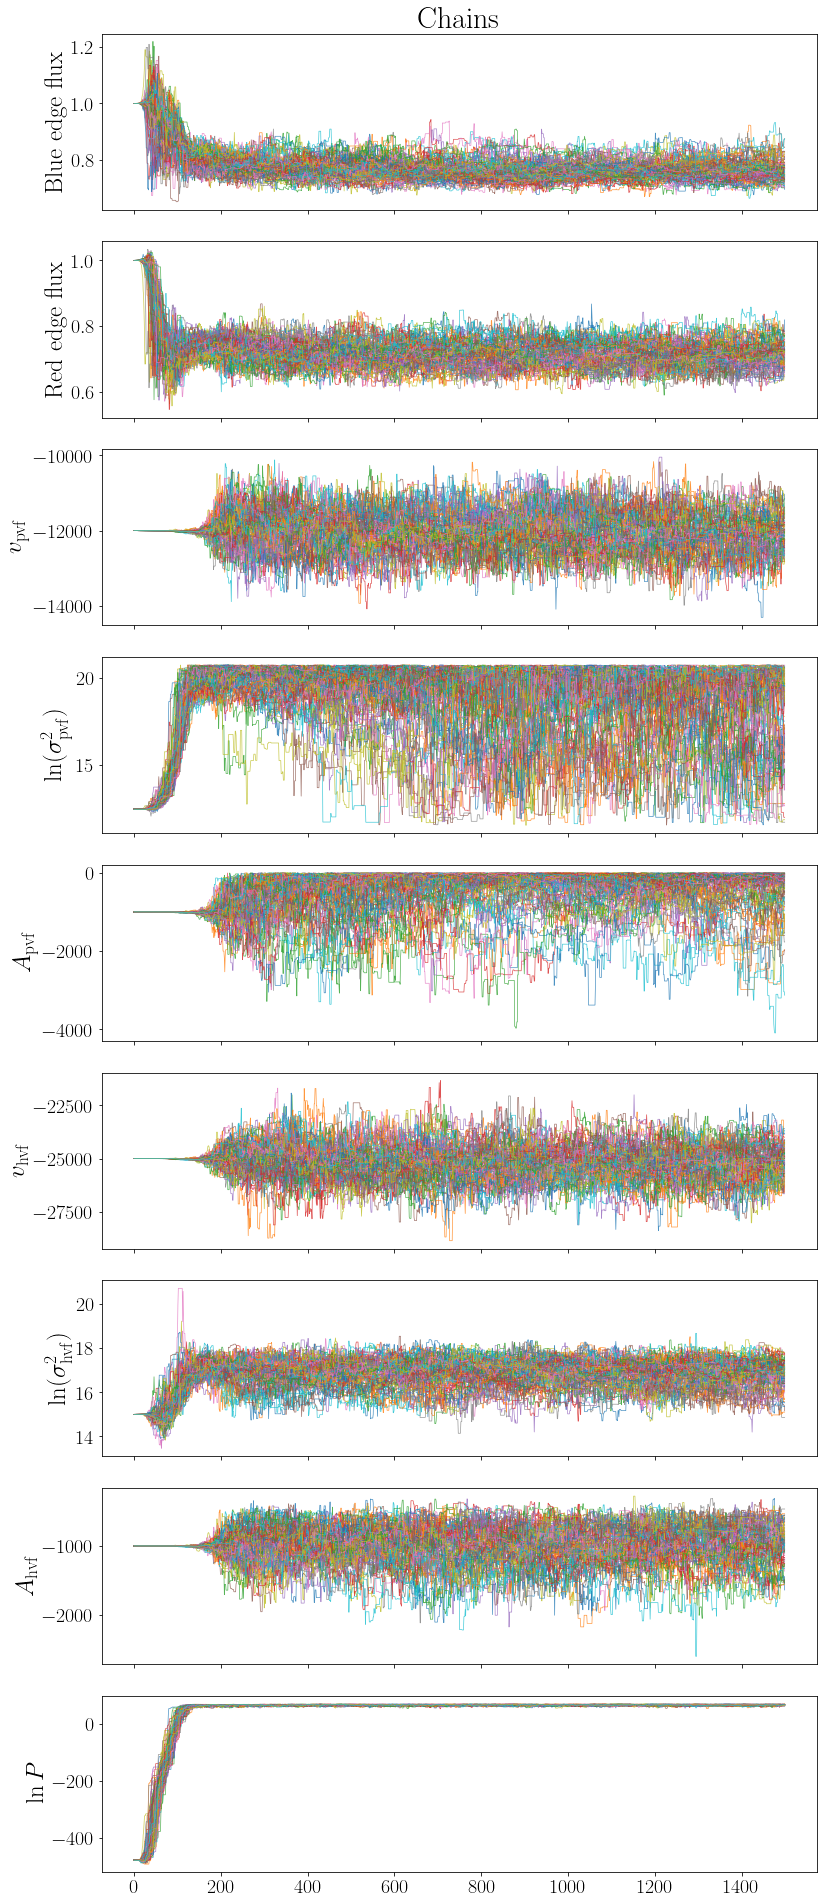

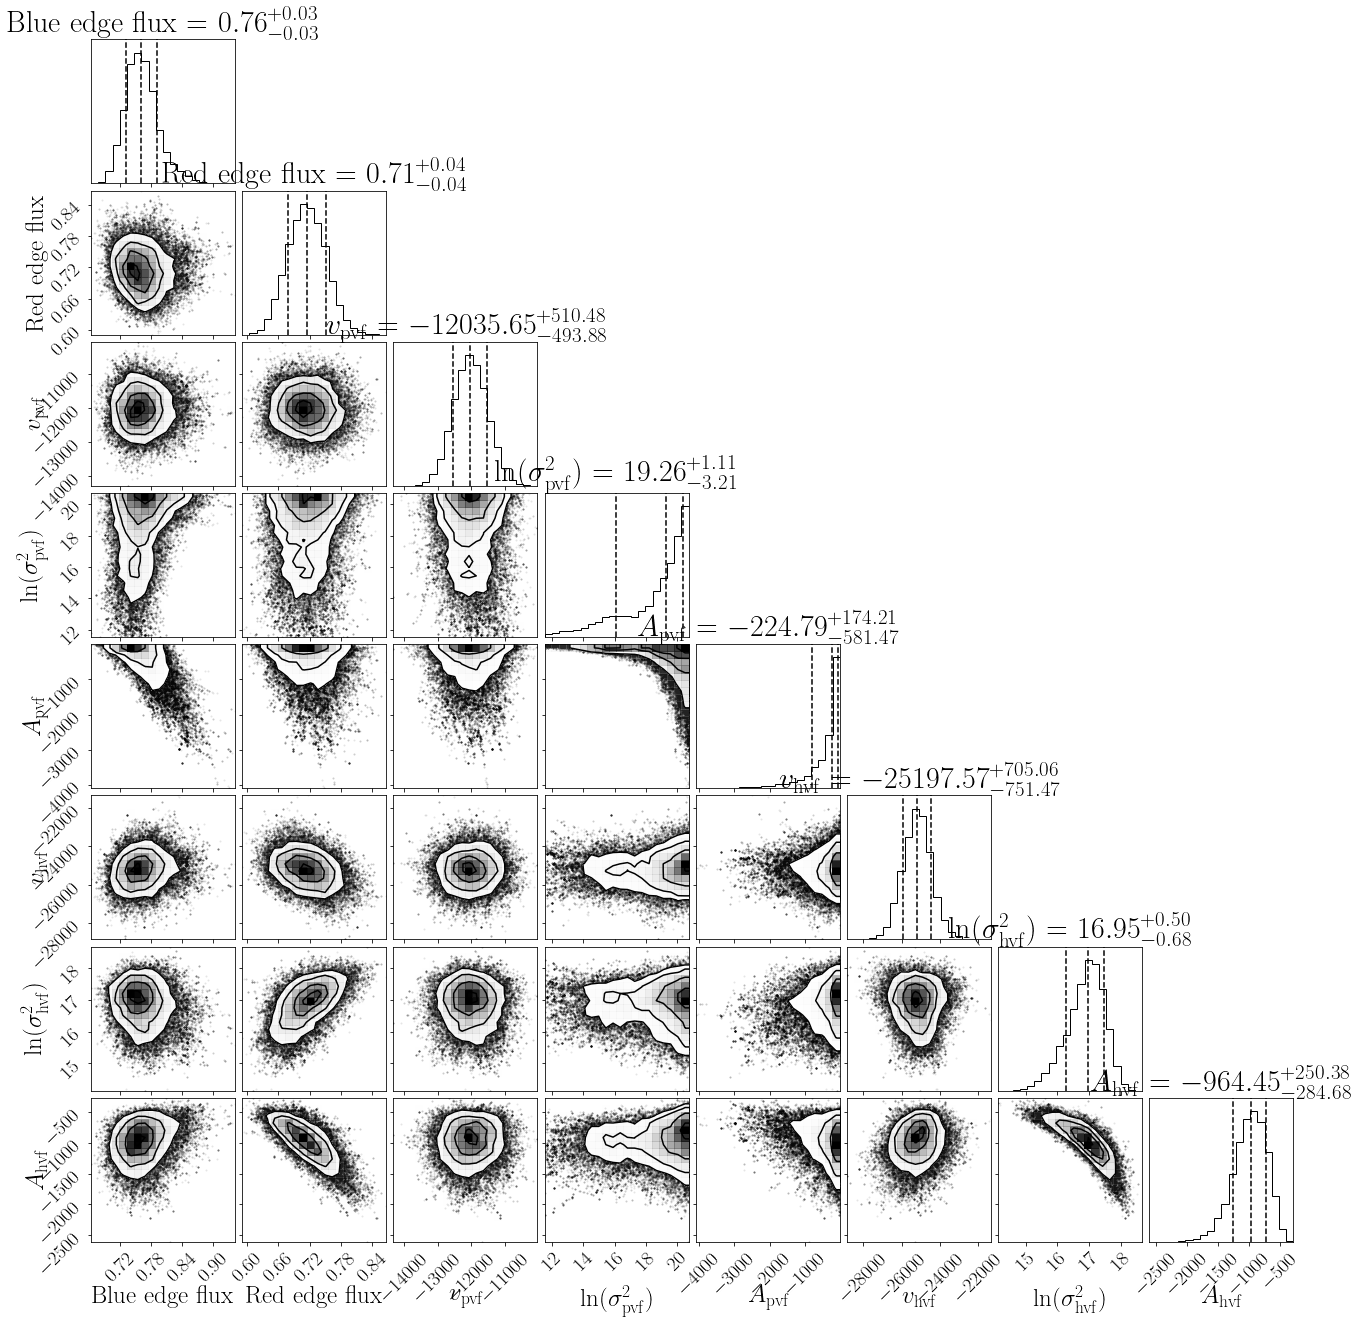

In [9]:
vel.plot_MCMC(sampler, 500)